In [3]:
#Importing necessary libraries

# Data manipulation
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model loading and saving
import joblib

# Text preprocessing
import pandas as pd
import re
from bs4 import BeautifulSoup
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Load saved machine learning models for games and movies

game_estimator = joblib.load("/games.pkl") # Load trained model for games
game_pkl_vec = joblib.load("/games_vec.pkl") # Load saved vectorizer for games

movie_estimator = joblib.load("/movies.pkl") # Load trained model for movies
movie_pkl_vec = joblib.load("/movies_vec.pkl") # Load saved vectorizer for movies

In [10]:
# Define the dictionary of contractions and their expanded forms
contractions = {
    "aight": "alright",
    "ain't": "am not",
    "amn't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "daren't": "dare not",
    "daresn't": "dare not",
    "dasn't": "dare not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "d'ye": "do you",
    "e'er": "ever",
    "everybody's": "everybody is",
    "everyone's": "everyone is",
    "finna": "fixing to",
    "g'day": "good day",
    "gimme": "give me",
    "giv'n": "given",
    "gonna": "going to",
    "gon't": "go not",
    "gotta": "got to",
    "hadn't": "had not",
    "had've": "had have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'dn't've'd": "he would not have had",
    "he'll": "he will",
    "he's": "he is",
    "he've": "he have",
    "how'd": "how would",
    "howdy": "how do you do",
    "how'll": "how will",
    "how're": "how are",
    "I'll": "I will",
    "I'm": "I am",
    "I'm'a": "I am about to",
    "I'm'o": "I am going to",
    "innit": "is it not",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "may've": "may have",
    "methinks": "me thinks",
    "mightn't": "might not",
    "might've": "might have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "must've": "must have",
    "needn't": "need not",
    "ne'er": "never",
    "o'clock": "of the clock",
    "o'er": "over",
    "ol'": "old",
    "oughtn't": "ought not",
    "'s": "is",
    "shalln't": "shall not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she shall",
    "she'll": "she will",
    "she's": "she has",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "somebody's": "somebody has",
    "somebody's": "somebody is",
    "someone's": "someone has",
    "someone's": "someone is",
    "something's": "something has",
    "something's": "something is",
    "so're": "so are",
    "that'll": "that shall",
    "that'll": "that will",
    "that're": "that are",
    "that's": "that has",
    "that's": "that is",
    "that'd": "that would",
    "that'd": "that had",
    "there'd": "there had",
    "there'd": "there would",
    "there'll": "there shall",
    "there'll": "there will",
    "there're": "there are",
    "there's": "there has",
    "there's": "there is",
    "these're": "these are",
    "these've": "these have",
    "they'd": "they had",
    "they'd": "they would",
    "they'll": "they shall",
    "they'll": "they will",
    "they're": "they are",
    "they're": "they were",
    "they've": "they have",
    "this's": "this has",
    "this's": "this is",
    "those're": "those are",
    "those've": "those have",
    "'tis": "it is",
    "to've": "to have",
    "'twas": "it was",
    "wanna": "want to",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd": "we would",
    "we'd": "we did",
    "we'll": "we shall",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'd": "what did",
    "what'll": "what shall",
    "what'll": "what will",
    "what're": "what are",
    "what're": "what were",
    "what's": "what has",
    "what's": "what is",
    "what's": "what does",
    "what've": "what have",
    "when's": "when has",
    "when's": "when is",
    "where'd": "where did",
    "where'll": "where shall",
    "where'll": "where will",
    "where're": "where are",
    "where's": "where has",
    "where's": "where is",
    "where's": "where does",
    "where've": "where have",
    "which'd": "which had",
    "which'd": "which would",
    "which'll": "which shall",
    "which'll": "which will",
    "which're": "which are",
    "which's": "which has",
    "which's": "which is",
    "which've": "which have",
    "who'd": "who would",
    "who'd": "who had",
    "who'd": "who did",
    "who'd've": "who would have",
    "who'll": "who shall",
    "who'll": "who will",
    "who're": "who are",
    "who's": "who has",
    "who's": "who is",
    "who's": "who does",
    "who've": "who have",
    "why'd": "why did",
    "why're": "why are",
    "why's": "why has",
    "why's": "why is",
    "why's": "why does",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd've": "you all would have",
    "y'all'dn't've'd": "you all would not have had",
    "y'all're": "you all are",
    "you'd": "you had",
    "you'd": "you would",
    "you'll": "you shall",
    "you'll": "you will",
    "you're": "you are",
    "you're": "you are",
    "you've": "you have",
    " u ": "you",
    " ur ": "your",
    " n ": "and"
}

# Function to expand contractions in text

def cont_to_exp(x):
    if type(x) is str: 
    # Iterating through each key-value pair in the dictionary and replacing the contraction with the expanded form
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [11]:
# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

#Function to preprocess text
def preprocess_text(text):
    
    # Convert all text to lowercase
    text = text.lower()

    # Expand contractions
    text = cont_to_exp(text)

    # Remove HTML tags
    text = BeautifulSoup(text, 'lxml').get_text()
    
    # Remove Emails
    text = re.sub(
        r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', text)

    # Remove URLs
    text = re.sub(
        r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text)
    
    # Create a spaCy Doc object
    # Tokenize text and remove stop words
    text = ' '.join(
        [t for t in text.split() if t not in STOP_WORDS])
    
    # Removal of special chars and punctuation
    text = re.sub('[^\w]', ' ', text)
    
    # Remove multiple spaces
    text =  ' '.join(text.split())
    return text


In [52]:
def test(clf, vec):
    print("\n")
    print("*"*60)
    text = input('Enter a text input for sentiment analysis: ')
    print("*"*60)
    # Preprocess the text input
    text = preprocess_text(text)

    # Transform the preprocessed text into a vector using the vectorizer
    test_vectorized_sentence = vec.transform([text])

    # Predict the sentiment score of the input text using the classifier
    prediction = clf.predict_proba(test_vectorized_sentence)

    # Get the index of the highest probability in the prediction array
    output = np.argmax(prediction[0])

    # Print the predicted sentiment score and its corresponding probability
    # print(output, "---> ", prediction[0][output])
    
    # Print the predicted sentiment score
    if output == 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Positive'
    print("\n")
    print("*"*60)
    print('Prediction:', sentiment)
    print("Accuracy: ", prediction[0][output])
    print("*"*60)

    # Return the result
    return sentiment,prediction[0][output],text

In [29]:
# Call the test function with the movie classifier, movie vectorizer, and sample text
test(movie_estimator, movie_pkl_vec,
     "This movie is not that as well as I think before, and I don't recommend you to watch")

0 --->  0.6710888283556937


In [16]:
test(movie_estimator, movie_pkl_vec,
     "It is the laziest possible version of a Mario movie, and for most viewers, young and old, that’ll be totally acceptable.")

0 --->  0.6601803353707802


In [17]:
test(movie_estimator, movie_pkl_vec,
     "This is a movie for adults, children, teens, and anyone that ever rocked with them Mario Bros.")

1 --->  0.7427445540083623


In [18]:
test(game_estimator, game_pkl_vec,
     "First My playing hours are like x because I also played a lot of houres outside steambrI am a rank  and play all the factions  I also have been a very good customer of gaijin as I have bought a lot in their store over the years And since I have invested so much time and money in it I would like to give a positive review But unfortunately I decided not to do that  And also have decided to uninstall this game At a given moment you are just done and all the trust is gonebrbrIt is a beautiful game but Devs are just the big problem They prefer to make new content instead of fixing old problemsbrAfter so many years I have lost all confidence in them They almost never listen to criticism from their fans and always think they know better They forget that the fans want to improve the game with their criticism but are often treated as Gaijins enemybrbrThere are so many problems that it is too long for a review but here is a list with the most importantbrbr BR compression Each vehicle has a battlerating like     ect A battlerating is an indication of how good a vehicle is and what it can encounter The maximum battlerating in a match can be  higher to  lower than your own vehicle Which means that you can sit between the highest BR and the lowest BR uptier and downtierbrNow the vehicles are too close together in terms of BR so compression Which means that some vehicles dominate heavily and some do not have a chance at all when they come  against each other in a match Gaijin does not want to solve this problem because they want everyone to find a match quickly this is my biggest problem with this gamebrbr Gaijin censorship Gaijin does not like criticism Post on their form that are critical and viewed by enough players just disappear Gaijin denies for example that it was possible to cheat in their game When a youtuber proved that it was possible Gaijin wanted to copyright strike against this person or put the Realistich game mode to Arcade As a kind of punishment for the player or something I have no idea why Gaijin behaved rather childishbrbr Reporting a bug During the years I reported all the bug that I found to gaijin I have send replays and information From kg bombs that do no damage tanks shot that disappeared in the air to planes that were shot in  and keeps flying smoothly I have seen everything over the years Fortunately there are never many bugs so that is goodbrBut I have never received any answers from Gaijin The only thing that is done is that your report gets closed completely ignored or can no longer be found disappears It looks more like Gaijin sees you as a burden instead of helpbrbrbrThere are many other problems in this game such as your tank shots that are absorbed into the Optics of the opponents tanks and do no damage or pay to win tanks like the is brbrBut i have to stop to keep the review a little short I close it here brWarthunder quotcanquot  become a much better game than it is now There are too few players online to earn money so gaijin wants to pull as much money as they can from the remaining players as possible instead of recognizing problems and solving them")


1 --->  0.5480129785468785




************************************************************

Welcome to the Text Sentiment Analysis Model Menu!

************************************************************

Which model would you like to use?:

1. Movies
2. Games


************************************************************
Enter your choice (1 or 2): 2
************************************************************


************************************************************

Please select an action:

1. Test the model
2. Display a visualization
3. Exit(Stop Model)


************************************************************
Enter your choice (1, 2 or 3): 2
************************************************************


************************************************************

PleaseChoose a visualization:

1. Bar plot
2. Line plot
3. Scatter Plot
4. Pie Plot
5. Count Plot
6. Exit(Stop Model)


************************************************************
Enter your visualaization choice: 1
*******************

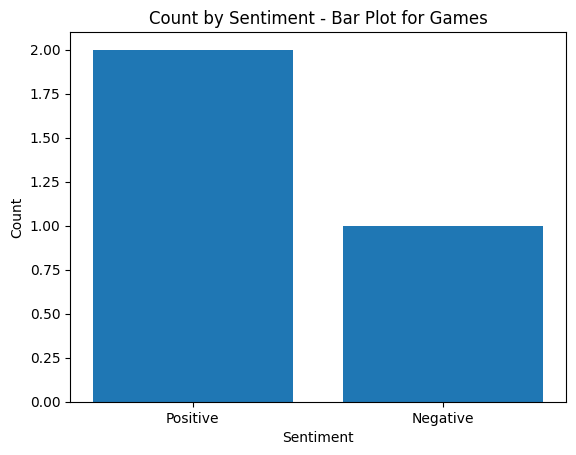

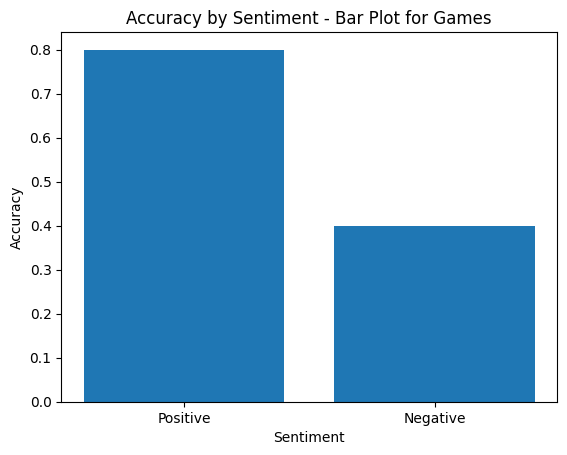



************************************************************

Please select an action:

1. Test the model
2. Display a visualization
3. Exit(Stop Model)


************************************************************
Enter your choice (1, 2 or 3): 2
************************************************************


************************************************************

PleaseChoose a visualization:

1. Bar plot
2. Line plot
3. Scatter Plot
4. Pie Plot
5. Count Plot
6. Exit(Stop Model)


************************************************************
Enter your visualaization choice: 2
************************************************************


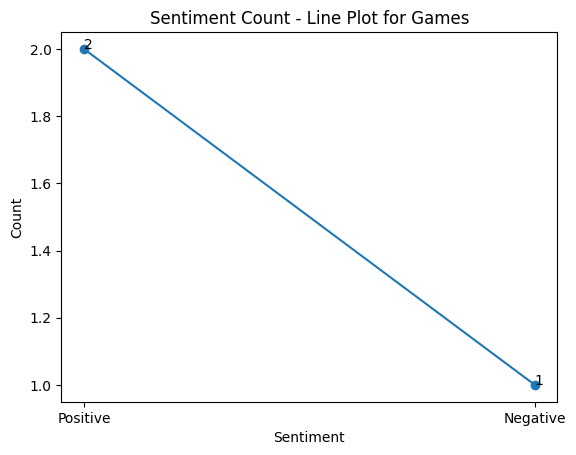

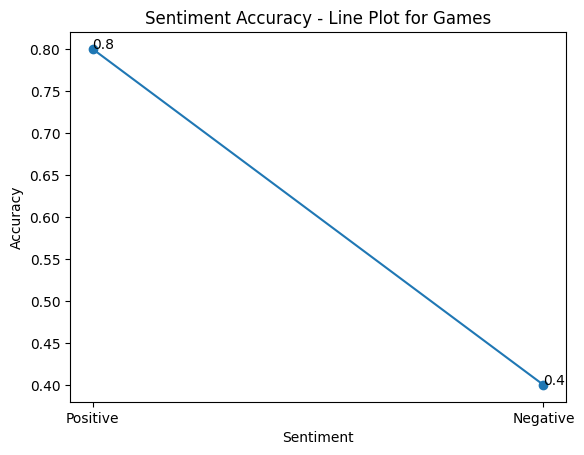



************************************************************

Please select an action:

1. Test the model
2. Display a visualization
3. Exit(Stop Model)


************************************************************
Enter your choice (1, 2 or 3): 2
************************************************************


************************************************************

PleaseChoose a visualization:

1. Bar plot
2. Line plot
3. Scatter Plot
4. Pie Plot
5. Count Plot
6. Exit(Stop Model)


************************************************************
Enter your visualaization choice: 3
************************************************************


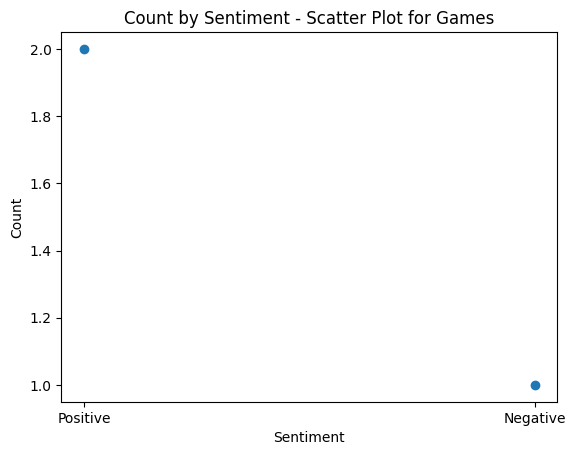

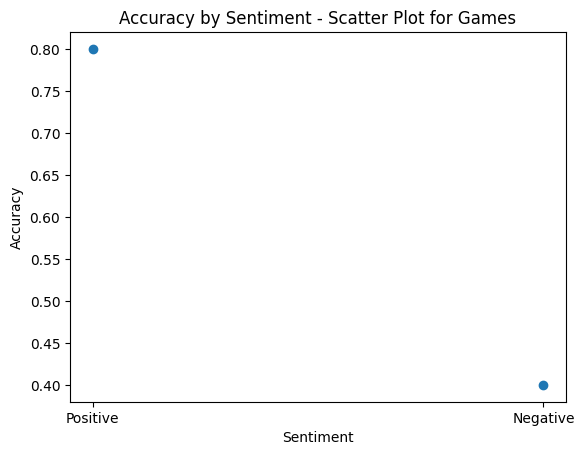



************************************************************

Please select an action:

1. Test the model
2. Display a visualization
3. Exit(Stop Model)


************************************************************
Enter your choice (1, 2 or 3): 2
************************************************************


************************************************************

PleaseChoose a visualization:

1. Bar plot
2. Line plot
3. Scatter Plot
4. Pie Plot
5. Count Plot
6. Exit(Stop Model)


************************************************************
Enter your visualaization choice: 4
************************************************************


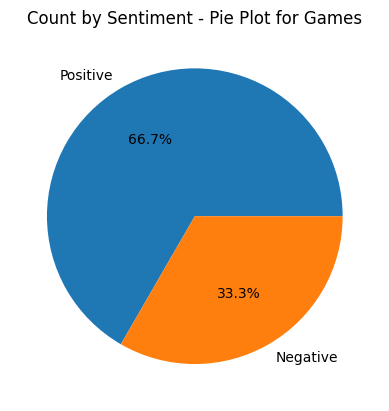

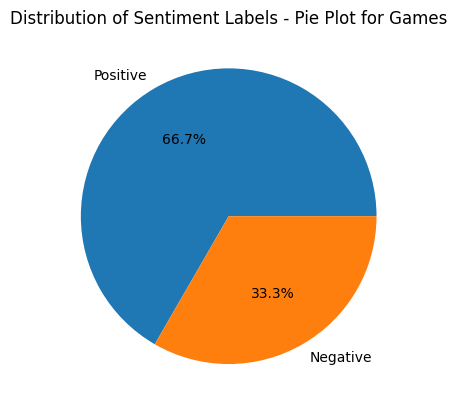



************************************************************

Please select an action:

1. Test the model
2. Display a visualization
3. Exit(Stop Model)


************************************************************
Enter your choice (1, 2 or 3): 2
************************************************************


************************************************************

PleaseChoose a visualization:

1. Bar plot
2. Line plot
3. Scatter Plot
4. Pie Plot
5. Count Plot
6. Exit(Stop Model)


************************************************************
Enter your visualaization choice: 5
************************************************************


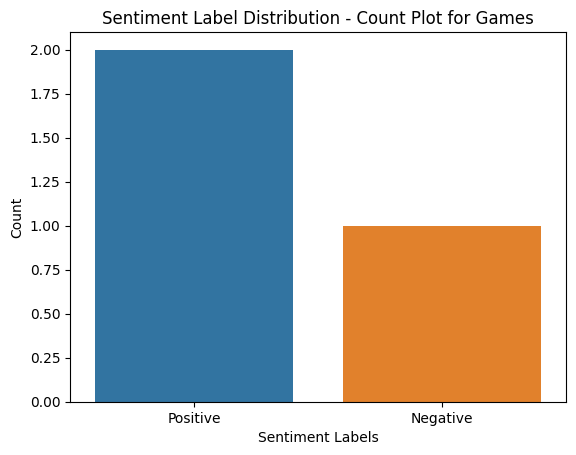



************************************************************

Please select an action:

1. Test the model
2. Display a visualization
3. Exit(Stop Model)


************************************************************
Enter your choice (1, 2 or 3): 3
************************************************************


************************************************************
Thank you for using this model.I hope you enjoyed that
************************************************************




In [69]:
from collections import Counter

def display_visualization(sentimenResult,accuracyResult,selectedModelOpt):
    print("\n")
    print("*"*60)
    print('\nPleaseChoose a visualization:\n')

    print('1. Bar plot')
    print('2. Line plot')
    print('3. Scatter Plot')
    print('4. Pie Plot')
    print('5. Count Plot')
    print('6. Exit(Stop Model)')
    print("\n")
    print("*"*60)
    choice = input('Enter your visualaization choice: ')
    print("*"*60)

    counts = Counter(sentimenResult);
    unique_labels = list(counts.keys())
    label_counts = list(counts.values())

    if choice == '1':
        if len(sentimentResult)>2:
          sentiment = unique_labels
          accuracy = label_counts
          # Bar plot
          plt.bar(sentiment, accuracy)
          # Labels and title
          plt.xlabel('Sentiment')
          plt.ylabel('Count')
          plt.title('Count by Sentiment - Bar Plot for '+selectedModelOpt)

          # Show plot
          plt.show()
        
        sentiment,accuracy=getPlotData(sentimenResult,accuracyResult)
        # Data
        #sentiment = sentimentResult
        #accuracy = accuracyResult
        # Bar plot
        plt.bar(sentiment, accuracy)
        # Labels and title
        plt.xlabel('Sentiment')
        plt.ylabel('Accuracy')
        plt.title('Accuracy by Sentiment - Bar Plot for '+selectedModelOpt)

        # Show plot
        plt.show()


    elif choice == '2':

        if len(sentimentResult)>2:
           # Your data (accuracy and label arrays)
            accuracy = label_counts
            labels = unique_labels

            # Create a list of integers to represent the position of the labels on the x-axis
            x_pos = [i for i, _ in enumerate(labels)]

            # Create a line plot
            plt.plot(x_pos, accuracy, marker='o')

            # Set the labels and title
            plt.xlabel('Sentiment')
            plt.ylabel('Count')
            plt.title('Sentiment Count - Line Plot for '+selectedModelOpt)

            # Add labels for each point on the line
            for i, txt in enumerate(accuracy):
                plt.annotate(txt, (x_pos[i], accuracy[i]))

            # Set the positions and labels for the x-axis
            plt.xticks(x_pos, labels)

            # Display the plot
            plt.show()

        # Your data (accuracy and label arrays)
        #accuracy = accuracyResult
        #labels = sentimentResult
        
        labels, accuracy=getPlotData(sentimenResult,accuracyResult)
        # Create a list of integers to represent the position of the labels on the x-axis
        x_pos = [i for i, _ in enumerate(labels)]

        # Create a line plot
        plt.plot(x_pos, accuracy, marker='o')

        # Set the labels and title
        plt.xlabel('Sentiment')
        plt.ylabel('Accuracy')
        plt.title('Sentiment Accuracy - Line Plot for '+selectedModelOpt)

        # Add labels for each point on the line
        for i, txt in enumerate(accuracy):
            plt.annotate(txt, (x_pos[i], accuracy[i]))

        # Set the positions and labels for the x-axis
        plt.xticks(x_pos, labels)

        # Display the plot
        plt.show()

    elif choice == '3':
       if len(sentimentResult)>2:
        # Data
        sentiment = unique_labels
        accuracy = label_counts

        # Scatter plot
        plt.scatter(sentiment, accuracy)

        # Labels and title
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.title('Count by Sentiment - Scatter Plot for '+selectedModelOpt)

        # Show plot
        plt.show()

        # Data
       #sentiment = sentimentResult
       #accuracy = accuracyResult
       sentiment,accuracy=getPlotData(sentimenResult,accuracyResult)

        # Scatter plot
       plt.scatter(sentiment, accuracy)

        # Labels and title
       plt.xlabel('Sentiment')
       plt.ylabel('Accuracy')
       plt.title('Accuracy by Sentiment - Scatter Plot for '+selectedModelOpt)

        # Show plot
       plt.show()

    elif choice == '4':

      if(len(sentimentResult)>2):
        # Define the data
        labels = unique_labels
        proportions = label_counts

        # Create a pie chart
        plt.pie(proportions, labels=labels, autopct='%1.1f%%')

        # Add chart title
        plt.title('Count by Sentiment - Pie Plot for '+selectedModelOpt)

        # Show the plot
        plt.show()


      # Define the data
      #labels = sentimentResult
      #proportions = accuracyResult
      labels,proportions=getPlotData(sentimenResult,accuracyResult)

      # Create a pie chart
      plt.pie(proportions, labels=labels, autopct='%1.1f%%')

      # Add chart title
      plt.title('Accuracy by Sentiment - Pie Plot for '+selectedModelOpt)

      # Show the plot
      plt.show()

    elif choice == '5':
      labels = sentimentResult
      sns.countplot(x=labels)
      plt.xlabel('Sentiment Labels')
      plt.ylabel('Count')
      plt.title('Sentiment Label Distribution - Count Plot for '+selectedModelOpt)
      plt.show()


    else:
        print('Invalid choice. Please select correct choice')


def getPlotData(labels,values):
  d = {}
  for key, value in zip(labels, values):
      if key not in d:
          d[key] = value
      else:
          d[key] += value

  unique_keys = list(d.keys())
  total_values = list(d.values())

  return unique_keys,total_values

# Create the interactive menu
# Manage user result
sentimentResult=['Positive','Negative','Positive']
accuracyResult=[0.3,0.4,0.5]
userInputs=[]
selectedModelOpt=""


while True:
    print("\n")
    print("*"*60)
    print("\nWelcome to the Text Sentiment Analysis Model Menu!\n")
    print("*"*60)
    print('\nWhich model would you like to use?:\n')
    print('1. Movies')
    print('2. Games')
    print("\n")
    print("*"*60)
    model_choice = input('Enter your choice (1 or 2): ')
    print("*"*60)
    if model_choice == '1':
        clf = movie_estimator
        vec = movie_pkl_vec
        selectedModelOpt="Movie"
        break

    elif model_choice == '2':
        clf = game_estimator
        vec = game_pkl_vec
        selectedModelOpt="Games"
        break

    else:
        print("\n")
        print('Invalid choice! Please select correct choice')
        

while True:
    print("\n")
    print("*"*60)
    print('\nPlease select an action:\n')
    print('1. Test the model')
    print('2. Display a visualization')
    print('3. Exit(Stop Model)')
    print("\n")
    print("*"*60)
    option_choice = input('Enter your choice (1, 2 or 3): ')
    print("*"*60)
    if option_choice == '1':

        result=test(clf, vec)
        sentimentResult.append(result[0]) 
        accuracyResult.append(result[1])
        userInputs.append(result[2])

    elif option_choice == '2':

        display_visualization(sentimentResult,accuracyResult,selectedModelOpt)

    elif option_choice == '3':
      print('\n')
      print("*"*60)
      print("Thank you for using this model.I hope you enjoyed that")
      print("*"*60)
      print('\n')
      break

    else:
        print('Invalid choice! Please select correct choice')